# No Show Appointment Data Wrangling
### By Akintola Malik Olasubomi


**Table of Contents**
- [Introduction](#intro)
- [Gathering and Importing](#step1)
- [Data Assessment](#step2)
- [Observations](#obs)
- [Data Cleaning](#step3)
- [Exploratory Data Analysis](#step4)
- [Conclusions](#conc)
- [References](#ref)

<a id='intro'></a>
## Introduction 

In this project, I will be investigating the dataset of appointment records for Brazil Public Hospitals.
The dataset contains 110,527 records and 14 attributes with details:
   - PatientId
        - Identification of a patient
   - AppointmentID
        - Identification of each appointment
   - Gender
        - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
   - Appointment Day
        - The day of the actuall appointment, when they have to visit the doctor.
   - Scheduled Day
        - The day someone called or registered the appointment, this is before appointment of course.
   - Age
        - How old is the patient.
   - Neighbourhood
        - Where the appointment takes place.
   - Scholarship
        - True of False 
   - Hipertension
        - True or False
   - Diabetes
        - True or False
   - Alcoholism
        - True or False
   - Handcap
        - True or False
   - SMS_received
        - 1 or more messages sent to the patient.
   - No-show
        - True or False.

<a id='step1'></a>
## Step 1 : Gathering and Importing

In [2]:
# Import the neccessary Libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Read the dataset into a pandas dataframe

app_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='step2'></a>
## Step 2 : Assessing Data

In [4]:
# Check shape
app_df.shape

(110527, 14)

In [5]:
# Check information on the dataset
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It seems there are no missing values in the dataset. But we would investigate further

In [6]:
# View dataset
app_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can see from the sample that the `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handicap` and the `No-show` are meant to be of boolean type. But all except No-show are integer type with boolean values 0 and 1. 

In [7]:
# Get summary statistics for integer type columns
app_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see an age of -1 in the dataset. Let's investigate the age further <br>
Also, we can see 4 in the Handicap column I would need to check it out also.

In [8]:
# Checking the value counts for each value in the age column
app_df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

-1 would be a wrong data entry hence I would remove it.

In [9]:
# Checking the unique values counts in the Handicap column
app_df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Handicap should be either zero or one.

In [10]:
# Check for duplicates appointment ids 
sum(app_df.AppointmentID.duplicated())

0

In [11]:
# Checking the Neighbourhood column
app_df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

<a id='obs'></a>
## Observations

1. There are 110,527 rows/records and 14 columns/attributes in the dataset
2. The `Scholarship`, `Hipertension`, `Diabetes`, `Alcoholism`, `Handicap`, `SMS_received` columns are meant to be boolean type not integer
3. Incosistency in spellings of the column names
4. Age of -1 is invalid and should be removed
5. Handicap should be either zero or one. Any number greater than 0 would be taken as 1
6. Both date and time contained in the `ScheduledDay` and `AppointmentDay` columns
7. No column for the number of days between the Scheduled date and appointment day.

<a id='step3'></a>
## Step 3 : Cleaning the data

In [13]:
# First create a new copy
app_clean = app_df.copy()

**Issue**

Column names

**Code**

In [14]:
# Renaming the columns
app_clean = app_clean.rename(columns={'PatientId':'patient_id', 'AppointmentID': 'appointment_id', 'Gender': 'gender', 'ScheduledDay': 'scheduled_day', 'AppointmentDay': 'appointment_day', 'Age': 'age', 'Neighbourhood': 'neighbourhood', 'Scholarship': 'scholarship', 'Hipertension': 'hypertension', 'Diabetes': 'diabetes', 'Alcoholism': 'alcoholism', 'Handcap': 'handicap', 'SMS_received': 'sms_received', 'No-show': 'no_show'})

**Test**

In [15]:
# Checking the column names
app_clean.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

**Issue**

Column datatype

**Code**

In [16]:
# Create dataframe of column and matching new datatype
new= {'patient_id': 'object',
         'appointment_id': 'object',
         'scheduled_day': 'datetime64',
         'appointment_day': 'datetime64',
         'scholarship': 'bool',
         'hypertension': 'bool',
         'diabetes': 'bool',
         'alcoholism': 'bool',
         'handicap': 'bool'}

# Change datatype
app_clean = app_clean.astype(new)

**Test**

In [17]:
# Checking the new datatypes
app_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110527 non-null  object        
 1   appointment_id   110527 non-null  object        
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  bool          
 8   hypertension     110527 non-null  bool          
 9   diabetes         110527 non-null  bool          
 10  alcoholism       110527 non-null  bool          
 11  handicap         110527 non-null  bool          
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
dtypes: bool(5), datetime

**Issue**

Age of -1 is invalid and should be removed

**Code**

In [18]:
# Getting the location of the record
app_clean.query('age == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,False,0,No


In [19]:
# dropping te 99,832nd record
app_clean.drop(99832, inplace=True)

**Test**

In [20]:
app_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110526 non-null  object        
 1   appointment_id   110526 non-null  object        
 2   gender           110526 non-null  object        
 3   scheduled_day    110526 non-null  datetime64[ns]
 4   appointment_day  110526 non-null  datetime64[ns]
 5   age              110526 non-null  int64         
 6   neighbourhood    110526 non-null  object        
 7   scholarship      110526 non-null  bool          
 8   hypertension     110526 non-null  bool          
 9   diabetes         110526 non-null  bool          
 10  alcoholism       110526 non-null  bool          
 11  handicap         110526 non-null  bool          
 12  sms_received     110526 non-null  int64         
 13  no_show          110526 non-null  object        
dtypes: bool(5), datetime

In [21]:
app_clean.query('age == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


**Issue**

Separate the day from the time in the `scheduled_day`column

**Code**

In [22]:
# creating a new column that contains only the date
app_clean['scheduled_date'] = app_clean.scheduled_day.dt.date

# Converting the column to datetime format
app_clean.scheduled_date = app_clean.scheduled_date.astype('datetime64')

**Test**

In [23]:
app_clean[['scheduled_day', 'scheduled_date']]

,scheduled_day,scheduled_date
0,2016-04-29 18:38:08,2016-04-29
1,2016-04-29 16:08:27,2016-04-29
2,2016-04-29 16:19:04,2016-04-29
3,2016-04-29 17:29:31,2016-04-29
4,2016-04-29 16:07:23,2016-04-29
...,...,...
110522,2016-05-03 09:15:35,2016-05-03
110523,2016-05-03 07:27:33,2016-05-03
110524,2016-04-27 16:03:52,2016-04-27
110525,2016-04-27 15:09:23,2016-04-27


In [24]:
# Drop the Scheduled day column
app_clean.drop('scheduled_day', axis=1, inplace=True)

In [25]:
app_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110526 non-null  object        
 1   appointment_id   110526 non-null  object        
 2   gender           110526 non-null  object        
 3   appointment_day  110526 non-null  datetime64[ns]
 4   age              110526 non-null  int64         
 5   neighbourhood    110526 non-null  object        
 6   scholarship      110526 non-null  bool          
 7   hypertension     110526 non-null  bool          
 8   diabetes         110526 non-null  bool          
 9   alcoholism       110526 non-null  bool          
 10  handicap         110526 non-null  bool          
 11  sms_received     110526 non-null  int64         
 12  no_show          110526 non-null  object        
 13  scheduled_date   110526 non-null  datetime64[ns]
dtypes: bool(5), datetime

In [26]:
app_clean.head()

,patient_id,appointment_id,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_date
0,29872499824296.0,5642903,F,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,No,2016-04-29
1,558997776694438.0,5642503,M,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,No,2016-04-29
2,4262962299951.0,5642549,F,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,No,2016-04-29
3,867951213174.0,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,No,2016-04-29
4,8841186448183.0,5642494,F,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,No,2016-04-29


**Issue**

Create a new column that calculates the number of days between the scheduled day and the appointment day.

**Code**

In [27]:
# Creates new column of days between scheduled and appointment
app_clean['waiting_days'] = (app_clean.appointment_day - app_clean.scheduled_date).dt.days

**Test**

In [28]:
app_clean[['scheduled_date', 'appointment_day', 'waiting_days']]

,scheduled_date,appointment_day,waiting_days
0,2016-04-29,2016-04-29,0
1,2016-04-29,2016-04-29,0
2,2016-04-29,2016-04-29,0
3,2016-04-29,2016-04-29,0
4,2016-04-29,2016-04-29,0
...,...,...,...
110522,2016-05-03,2016-06-07,35
110523,2016-05-03,2016-06-07,35
110524,2016-04-27,2016-06-07,41
110525,2016-04-27,2016-06-07,41


In [29]:
# Checking the statistics on the waiting days column
app_clean.waiting_days.describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

We can see that the min number of days in waiting is a negative number, which is impossible. Hence we would need to checkout more on this

**Issue**

Negative number of `waiting_days`. Investigate and drop if necessary

In [30]:
app_clean.query('waiting_days < 0')

,patient_id,appointment_id,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_date,waiting_days
27033,7839272661752.0,5679978,M,2016-05-09,38,RESISTÊNCIA,False,False,False,False,True,0,Yes,2016-05-10,-1
55226,7896293967868.0,5715660,F,2016-05-17,19,SANTO ANTÔNIO,False,False,False,False,True,0,Yes,2016-05-18,-1
64175,24252258389979.0,5664962,F,2016-05-04,22,CONSOLAÇÃO,False,False,False,False,False,0,Yes,2016-05-05,-1
71533,998231581612122.0,5686628,F,2016-05-05,81,SANTO ANTÔNIO,False,False,False,False,False,0,Yes,2016-05-11,-6
72362,3787481966821.0,5655637,M,2016-05-03,7,TABUAZEIRO,False,False,False,False,False,0,Yes,2016-05-04,-1


There are only five records with less than zero waiting days. Hence we can drop them.

**Code**

In [31]:
# Dropping the records with less than zero waiting days by setting the dataframe to only those with Zero and above waiting days
app_clean = app_clean.query('waiting_days >= 0')

**Test**

In [32]:
app_clean.query('waiting_days < 0')

,patient_id,appointment_id,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,scheduled_date,waiting_days


In [33]:
app_clean.shape

(110521, 15)

Now, we have 110,521 records

**Issue**

Rename the `no_show` column to `showed_up` and denote 'No' as 'Yes' and 'Yes' as 'No'.

**Code**

In [34]:
app_clean.no_show = app_clean.no_show.replace('No', 'yes')
app_clean.no_show = app_clean.no_show.replace('Yes', 'no')

# Rename column
app_clean.rename(columns={'no_show':'showed_up'}, inplace=True)

In [35]:
app_clean.head()

,patient_id,appointment_id,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,scheduled_date,waiting_days
0,29872499824296.0,5642903,F,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,yes,2016-04-29,0
1,558997776694438.0,5642503,M,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,yes,2016-04-29,0
2,4262962299951.0,5642549,F,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,yes,2016-04-29,0
3,867951213174.0,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,yes,2016-04-29,0
4,8841186448183.0,5642494,F,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,yes,2016-04-29,0


Segregating by weekend and weekdays

**Issue**

Name of days needed

**Code**

In [36]:
# Create a new column with the value for day name of the appointment day
app_clean['day_group'] = [days.day_name() for days in app_clean.appointment_day]

In [37]:
app_clean.day_group.value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: day_group, dtype: int64

**Issue**

Need to create an age group column

**Code**

In [38]:
def group(age):
    '''Categorizes the age into specific age groups'''
    if 0 <= age < 13:
        return ('Children')
    elif 13 <= age < 20:
        return ('Teenager')
    elif 20 <= age < 35:
        return ('Young Adult')
    elif 35 <= age < 65:
        return ('Adult')
    else:
        return ('Elderly')

    
# apply the function to the age column and assign its value to the age group column
app_clean['age_group'] = app_clean.age.apply(group)

**Test**

In [39]:
app_clean[['age', 'age_group']]

,age,age_group
0,62,Adult
1,56,Adult
2,62,Adult
3,8,Children
4,56,Adult
...,...,...
110522,56,Adult
110523,51,Adult
110524,21,Young Adult
110525,38,Adult


<a id='step4'></a>
## Step 4 : Exploratory Data Analysis

### Relatioship between Gender and Appointments?

In [40]:
gender = app_clean.gender.value_counts()
gender

F    71836
M    38685
Name: gender, dtype: int64

In [41]:
# Creating a function to calculate percentages
def calc_perc(percent, gender):
    abs_ = int(percent/100.*np.sum(gender))
    return "{:.2f}%\n({:d})".format(percent, abs_)

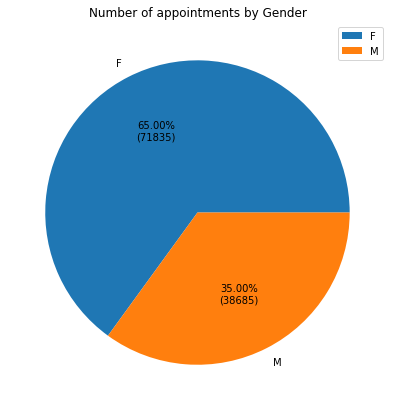

In [42]:
plt.figure(figsize = (7, 7))
plt.pie(gender, labels = gender.index.values, autopct = lambda percent: calc_perc(percent, gender))
plt.legend()
plt.title('Number of appointments by Gender');

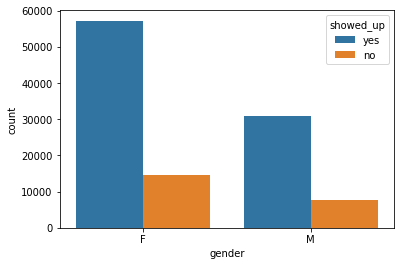

In [43]:
# select a specific color to use
base_color = sns.color_palette()[0]

#plots a barchart of the gender by their showed up status
sns.countplot(data = app_clean, x = 'gender', hue = 'showed_up');

In [44]:
def get_pct(column):
    '''Function to get the respective percentage of the people who showed up or not with respect to a selected attribute'''
    grouped = app_clean.groupby(['showed_up', column]).showed_up.count()
    df = pd.DataFrame(grouped)
    [f1, t1] = df.loc['no'].showed_up.values
    [f2, t2] = df.loc['yes'].showed_up.values
    [pct_f1, pct_t1, pct_f2, pct_t2] = [round(f1/(f1+t1)*100, 2), round(t1/(f1+t1)*100, 2), round(f2/(f2+t2)*100, 2), round(t2/(f2+t2)*100, 2)]
    df['percentage_showed_up'] = [pct_f1, pct_t1, pct_f2, pct_t2]
    #df = df.rename(columns={'showed_up':'Percentage of showed_up'})
    return(df)



get_pct('gender')

showed_up  percentage_showed_up
showed_up gender                                 
no        F           14591                 65.39
          M            7723                 34.61
yes       F           57245                 64.90
          M           30962                 35.10

> Female schedules the highest appointments with 65% of the total records

### Relationship between Age and Appointments?

<AxesSubplot:ylabel='Frequency'>

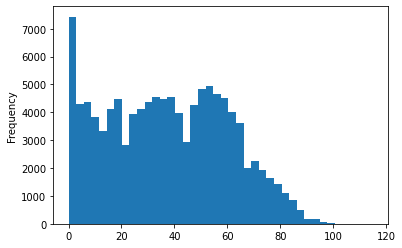

In [45]:
app_clean.age.plot(kind='hist', bins = 40)

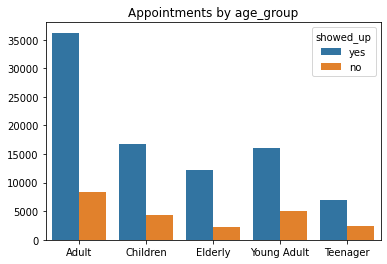

In [46]:
sns.countplot(data = app_clean, x = 'age_group', hue = 'showed_up', )
plt.xlabel('')
plt.ylabel('')
plt.title('Appointments by age_group');

### Appointments by Day

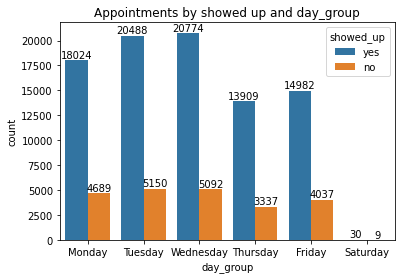

In [47]:
#Sort the day group column
day_sort = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ordered = pd.api.types.CategoricalDtype(ordered = True, categories = day_sort)
app_clean['day_group'] = app_clean.day_group.astype(ordered)

# Create the grouped bar chart


# Create a new dataframe with the number of True and False grouped by day
def plot_bar(column1):
    '''Function to plot a bar chart and label accordingly'''
    
    # Creates a grouped by data using the column1 as reference
    grouped = app_clean.groupby(['showed_up', column1]).showed_up.count()
    df = pd.DataFrame(grouped)
    
    # Gets the value labels 
    [abs_values1, abs_values2] = [df.loc['yes'].showed_up.values, df.loc['no'].showed_up.values]
    
    # Plots the bar chart accordingly
    ax = sns.countplot(data = app_clean, x=column1, hue='showed_up')
    
    # Plot the labels on the chart accordingly
    ax.bar_label(container=ax.containers[0], labels=abs_values1);
    ax.bar_label(container=ax.containers[1], labels=abs_values2);
    plt.title('Appointments by showed up and '+ column1)


plot_bar('day_group') 

In [48]:
app_clean.head()

,patient_id,appointment_id,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,scheduled_date,waiting_days,day_group,age_group
0,29872499824296.0,5642903,F,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,yes,2016-04-29,0,Friday,Adult
1,558997776694438.0,5642503,M,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,yes,2016-04-29,0,Friday,Adult
2,4262962299951.0,5642549,F,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,yes,2016-04-29,0,Friday,Adult
3,867951213174.0,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,yes,2016-04-29,0,Friday,Children
4,8841186448183.0,5642494,F,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,yes,2016-04-29,0,Friday,Adult


### Relationship between showing up and some key attributes such as scholarship, hypertension, diabetes, alcoholism, handicap


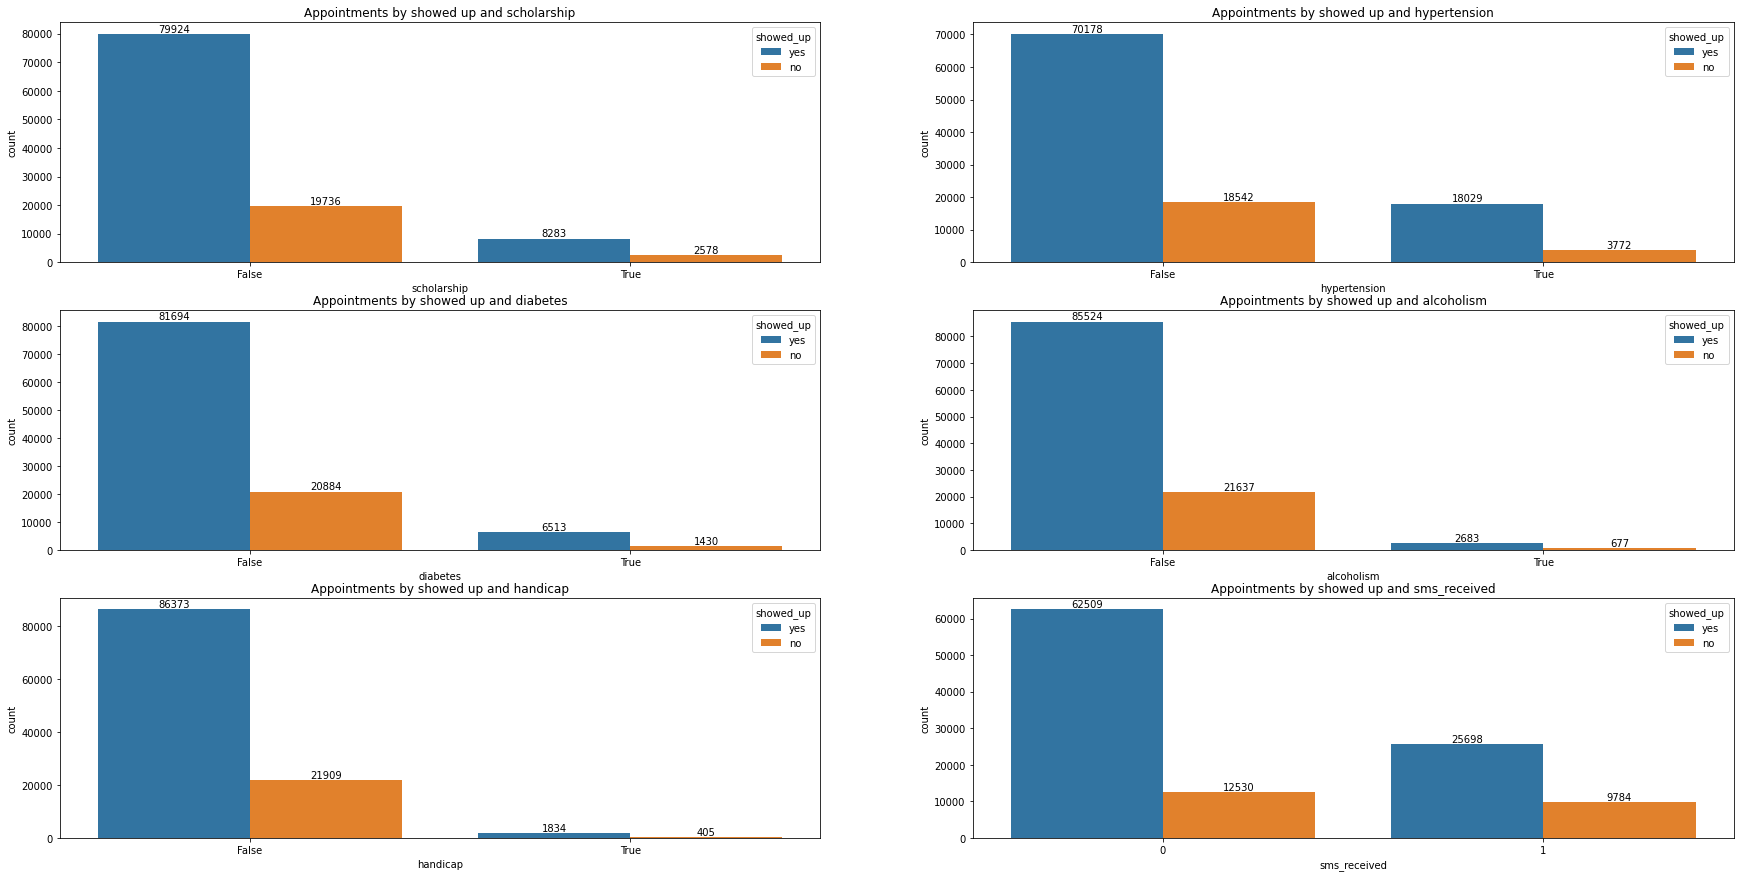

In [49]:
plt.figure(figsize = [30, 15])

plt.subplot(3,2,1)
plot_bar('scholarship')

plt.subplot(3,2,2)
plot_bar('hypertension')

plt.subplot(3,2,3)
plot_bar('diabetes')

plt.subplot(3,2,4)
plot_bar('alcoholism')

plt.subplot(3,2,5)
plot_bar('handicap')

plt.subplot(3,2,6)
plot_bar('sms_received')

In [50]:
get_pct('scholarship')

showed_up  percentage_showed_up
showed_up scholarship                                 
no        False            19736                 88.45
          True              2578                 11.55
yes       False            79924                 90.61
          True              8283                  9.39

In [51]:
get_pct('hypertension')

showed_up  percentage_showed_up
showed_up hypertension                                 
no        False             18542                 83.10
          True               3772                 16.90
yes       False             70178                 79.56
          True              18029                 20.44

In [52]:
get_pct('alcoholism')

showed_up  percentage_showed_up
showed_up alcoholism                                 
no        False           21637                 96.97
          True              677                  3.03
yes       False           85524                 96.96
          True             2683                  3.04

In [53]:
get_pct('diabetes')

showed_up  percentage_showed_up
showed_up diabetes                                 
no        False         20884                 93.59
          True           1430                  6.41
yes       False         81694                 92.62
          True           6513                  7.38

In [54]:
# For handicap
get_pct('handicap')

showed_up  percentage_showed_up
showed_up handicap                                 
no        False         21909                 98.18
          True            405                  1.82
yes       False         86373                 97.92
          True           1834                  2.08

### Top ten neighbourhoods by their appointments

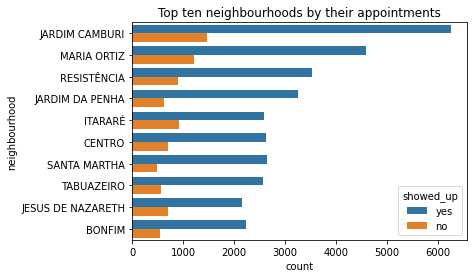

In [55]:
sort = app_clean.neighbourhood.value_counts().nlargest(10).index
sns.countplot(data = app_clean, y='neighbourhood', hue='showed_up', order=sort);
plt.title('Top ten neighbourhoods by their appointments');

In [56]:
app_clean.head()

,patient_id,appointment_id,gender,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,scheduled_date,waiting_days,day_group,age_group
0,29872499824296.0,5642903,F,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,0,yes,2016-04-29,0,Friday,Adult
1,558997776694438.0,5642503,M,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,0,yes,2016-04-29,0,Friday,Adult
2,4262962299951.0,5642549,F,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,0,yes,2016-04-29,0,Friday,Adult
3,867951213174.0,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,0,yes,2016-04-29,0,Friday,Children
4,8841186448183.0,5642494,F,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,0,yes,2016-04-29,0,Friday,Adult


### Relationship between waiting days and Appointments

<AxesSubplot:xlabel='waiting_days', ylabel='count'>

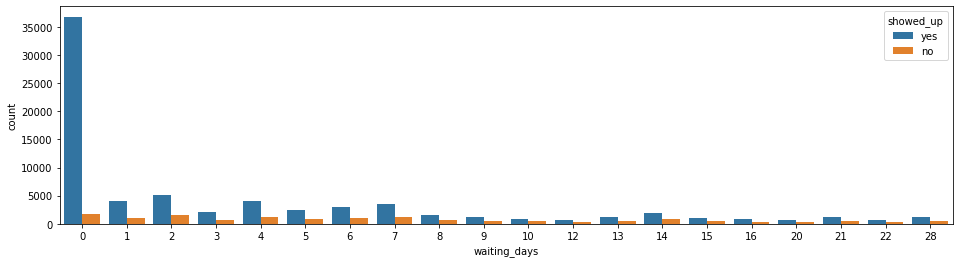

In [81]:
plt.figure(figsize=(16,4))
sort = app_clean.waiting_days.value_counts().nlargest(20).index
sns.countplot(data=app_clean, x='waiting_days', hue='showed_up', order=sort.sort_values())

<AxesSubplot:xlabel='waiting_days', ylabel='count'>

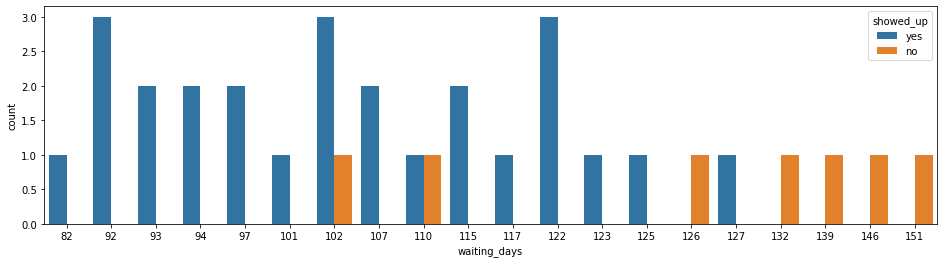

In [82]:
plt.figure(figsize=(16,4))
sort = app_clean.waiting_days.value_counts().nsmallest(20).index
sns.countplot(data=app_clean, x='waiting_days', hue='showed_up', order=sort.sort_values())

In [97]:
grouped = app_clean.query('waiting_days > 10').groupby('showed_up').showed_up.count()
df = pd.DataFrame(grouped)
f1 = df.loc['no'].values[0]
t1 = df.loc['yes'].values[0]
[pct_f1,pct_t1] = [round(f1/(f1+t1)*100, 2), round(t1/(f1+t1)*100, 2)]
df['percentage_showed_up'] = [pct_f1, pct_t1]
df

,showed_up,percentage_showed_up
showed_up,,
no,11200,32.51
yes,23246,67.49


In [98]:
grouped = app_clean.query('waiting_days <= 10').groupby('showed_up').showed_up.count()
df = pd.DataFrame(grouped)
f1 = df.loc['no'].values[0]
t1 = df.loc['yes'].values[0]
[pct_f1,pct_t1] = [round(f1/(f1+t1)*100, 2), round(t1/(f1+t1)*100, 2)]
df['percentage_showed_up'] = [pct_f1, pct_t1]
df

,showed_up,percentage_showed_up
showed_up,,
no,11114,14.61
yes,64961,85.39


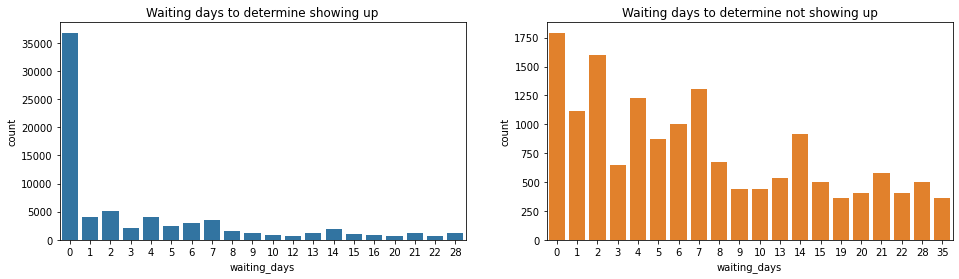

In [58]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
no_show = app_clean.query('showed_up == "yes"')
sort = no_show.waiting_days.value_counts().nlargest(20).index
sns.countplot(data=no_show, x='waiting_days', order=sort.sort_values(), color = sns.color_palette()[0])
plt.title('Waiting days to determine showing up')


plt.subplot(1,2,2)
no_show = app_clean.query('showed_up == "no"')
sort = no_show.waiting_days.value_counts().nlargest(20).index
sns.countplot(data=no_show, x='waiting_days', order=sort.sort_values(), color = sns.color_palette()[1])
plt.title('Waiting days to determine not showing up');

<a id='conc'></a>
## Conclusions

1. There are 110,520 records in the dataset after cleaning. 65% of the appointments were made by Females while 35% by their Male counterparts.
        a. This leads to more females than males not showing up. 
        b. On further investigation, it is discovered that almost the same percentages of total females and of total males do not show up. While 20.31% of the Females do not show up to their appointments, 19.96% of males do not show up.
        c. Then Females make up 65.39% of no-shows
        
2. While babies of some months old (zero years) have the highest number of appointments, a whole 20% of them end up not showing up to their appointments. 
        a. In general, Adults have the highest number of appointments, followed by children 

3. Although Wednesday have the highest number of booked appointments, Tuesday is the day most  people do not show up.

4. The highest number of days in waiting is 179, with 10 records and 8 no-shows. 
        a. There is a 85.39% chance of showing up if your waiting days is 10 and below, anything above ten days reults to a chance of only 67.49%.
        b. Most people with same schedule and appointment date always show up with just a 4% chance of not showing up to their appointment
        
5. Jardim Camburi neighbourhood has the highest number of no-shows

<a id='ref'></a>
## References 

https://stackoverflow.com/questions/22132525/add-column-with-number-of-days-between-dates-in-dataframe-pandas <br>
https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Timestamp.html <br>
https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot

In [105]:
app_clean.to_csv('no_show_appointments_clean.csv')